In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

import gmaps

from config import gkey

In [116]:
os.getcwd()

'C:\\Users\\lianx\\Desktop\\UCSD_project\\Data_Viz_Project'

In [118]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

state_abbre = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI","ID","IL","IN",
              "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
              "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","PR","RI","SC","SD","TN",
              "TX","UT","VT","VA","WA","WV","WI","WY"]

states_dict = dict(zip(states, state_abbre))


In [4]:
# File to Load 
income_state_to_load = "./list_of_state_and_counties_by_median_income.csv"

# Read hospital Data File and store into Pandas Data Frames
income_state0 = pd.read_csv(income_state_to_load)
income_state0['State'] = income_state0['State'].map(states_dict)

income_state0.head()

,State,County,MedianIncome
0,AL,cleburne,46069
1,AL,dale,56132
2,AL,tuscaloosa,58922
3,AL,talladega,43074
4,AL,monroe,36807


In [119]:
income_state = income_state0.groupby('State').mean()
income_state.head()

,MedianIncome
State,
AK,71969.724138
AL,47967.761194
AR,44976.613333
AZ,49903.933333
CA,66207.379310


In [120]:
# File to Load 
hospital_state_to_load = "./hospital_state_location.csv"

# Read hospital Data File and store into Pandas Data Frames
hospital_state = pd.read_csv(hospital_state_to_load)

hospital_state.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude
0,TX,798,28701845.0,2.78,31.4757,-99.3312
1,CA,569,39557045.0,1.44,37.1841,-119.4696
2,FL,350,21299325.0,1.64,28.6305,-82.4497
3,OH,290,11689442.0,2.48,40.2862,-82.7937
4,PA,279,12807060.0,2.18,40.8781,-77.7996


In [121]:
# File to Load 
unemployment_state_to_load = "./states_by_unemployment_rate.csv"

# Read hospital Data File and store into Pandas Data Frames
unemployment_state = pd.read_csv(unemployment_state_to_load)
unemployment_state['State'] = unemployment_state['State'].map(states_dict)
unemployment_state.head()



,State,Unemployment
0,HI,2.1
1,ND,2.6
2,NH,2.6
3,ME,2.7
4,VT,2.8


In [122]:
# File to Load 
crime_state_to_load = "./crime_by_state.csv"

# Read hospital Data File and store into Pandas Data Frames
crime_state0 = pd.read_csv(crime_state_to_load)

crime_state0.head()

,year,state_abbr,state_id,population,aggravated_assault,arson,burglary,homicide,larceny,motor_vehicle_theft,property_crime,rape_legacy,rape_revised,robbery,violent_crime
0,1983,AL,2,3959000,11281,NaN,42485,364,94279,9126,145890,931,NaN,3895,16471
1,1984,AL,2,3990000,11995,NaN,39970,374,89198,9319,138487,1002,NaN,3833,17204
2,2001,AL,2,4468912,12250,NaN,40642,379,119992,12619,173253,1369,NaN,5584,19582
3,2002,AL,2,4478896,12002,NaN,42578,303,123932,13890,180400,1664,NaN,5962,19931
4,2003,AL,2,4503726,11338,NaN,43245,299,124039,14957,182241,1656,NaN,6038,19331


In [123]:
crime_state0 = crime_state0.set_index('year')
crime_state0.head(5)

,state_abbr,state_id,population,aggravated_assault,arson,burglary,homicide,larceny,motor_vehicle_theft,property_crime,rape_legacy,rape_revised,robbery,violent_crime
year,,,,,,,,,,,,,,
1983,AL,2,3959000,11281,NaN,42485,364,94279,9126,145890,931,NaN,3895,16471
1984,AL,2,3990000,11995,NaN,39970,374,89198,9319,138487,1002,NaN,3833,17204
2001,AL,2,4468912,12250,NaN,40642,379,119992,12619,173253,1369,NaN,5584,19582
2002,AL,2,4478896,12002,NaN,42578,303,123932,13890,180400,1664,NaN,5962,19931
2003,AL,2,4503726,11338,NaN,43245,299,124039,14957,182241,1656,NaN,6038,19331


In [124]:
type(crime_state0.index[0])

numpy.int64

In [125]:
crime_state = crime_state0.loc[2017,['state_abbr','motor_vehicle_theft','property_crime','robbery','violent_crime']]
#crime_state1 = crime_state0.loc[2017,:]
crime_state = crime_state.reset_index()
crime_state.head()


,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime
0,2017,AL,12841,144160,4217,25551
1,2017,AK,4258,26204,951,6133
2,2017,AZ,19058,204515,7440,35644
3,2017,AR,7253,92489,1935,16671
4,2017,CA,168391,987114,56622,177627


In [126]:
#merge income and hospital

data_complete1 = pd.merge(hospital_state, income_state, how="left", on=["State", "State"])
data_complete1.head()
data_complete1 = pd.merge(data_complete1, unemployment_state, how="left", on=["State", "State"])
data_complete1.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8


In [127]:
#merge crime data
data_complete2 = pd.merge(data_complete1, crime_state, how="left", left_on="State", right_on="state_abbr")
data_complete2.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0,2017.0,TX,68041.0,725328.0,32267.0,124238.0
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3,2017.0,CA,168391.0,987114.0,56622.0,177627.0
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9,2017.0,FL,42914.0,527220.0,18597.0,85625.0
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4,2017.0,OH,20253.0,282034.0,11605.0,34683.0
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8,2017.0,PA,12985.0,211220.0,11793.0,40120.0


In [128]:
#calculate rate
data_complete2['Income%'] = data_complete2['MedianIncome']/data_complete2['POPESTIMATE2018']*100000
data_complete2['motor_vehicle_theft%'] = data_complete2['motor_vehicle_theft']/data_complete2['POPESTIMATE2018']*100000
data_complete2['property_crime%'] = data_complete2['property_crime']/data_complete2['POPESTIMATE2018']*100000
data_complete2['robbery%'] = data_complete2['robbery']/data_complete2['POPESTIMATE2018']*100000
data_complete2['violent_crime%'] = data_complete2['violent_crime']/data_complete2['POPESTIMATE2018']*100000
data_complete2['total_crime%'] = (data_complete2['property_crime'] + data_complete2['violent_crime'])/data_complete2['POPESTIMATE2018']*100000

data_complete2.head()

,State,Hospital,POPESTIMATE2018,Density,Latitude,Longitude,MedianIncome,Unemployment,year,state_abbr,motor_vehicle_theft,property_crime,robbery,violent_crime,Income%,motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,total_crime%
0,TX,798,28701845.0,2.78,31.4757,-99.3312,55457.161417,4.0,2017.0,TX,68041.0,725328.0,32267.0,124238.0,193.218106,237.061415,2527.112804,112.421344,432.857191,2959.969995
1,CA,569,39557045.0,1.44,37.1841,-119.4696,66207.379310,4.3,2017.0,CA,168391.0,987114.0,56622.0,177627.0,167.371904,425.691555,2495.418958,143.140116,449.040114,2944.459072
2,FL,350,21299325.0,1.64,28.6305,-82.4497,53106.253731,3.9,2017.0,FL,42914.0,527220.0,18597.0,85625.0,249.333036,201.480563,2475.289710,87.312626,402.008045,2877.297755
3,OH,290,11689442.0,2.48,40.2862,-82.7937,57974.443182,4.4,2017.0,OH,20253.0,282034.0,11605.0,34683.0,495.955608,173.258912,2412.724234,99.277622,296.703641,2709.427875
4,PA,279,12807060.0,2.18,40.8781,-77.7996,60868.805970,4.8,2017.0,PA,12985.0,211220.0,11793.0,40120.0,475.275403,101.389390,1649.246587,92.082024,313.264715,1962.511302


In [129]:
#all data for states data frame
data_complete = {}
data_complete = pd.DataFrame({
    'State':data_complete2['State'],
    'Latitude':data_complete2['Latitude'],
    'Longitude':data_complete2['Longitude'],
    'Hospital%':data_complete2['Density'],
    'Income%':data_complete2['Income%'],
    'Unemployment%':data_complete2['Unemployment'],
    'Motor_vehicle_theft%':data_complete2['motor_vehicle_theft%'],
    'property_crime%':data_complete2['property_crime%'],
    'robbery%':data_complete2['robbery%'],
    'violent_crime%':data_complete2['violent_crime%'],
    'TotalCrime%':data_complete2['total_crime%']
})

data_complete.head()

,State,Latitude,Longitude,Hospital%,Income%,Unemployment%,Motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,TotalCrime%
0,TX,31.4757,-99.3312,2.78,193.218106,4.0,237.061415,2527.112804,112.421344,432.857191,2959.969995
1,CA,37.1841,-119.4696,1.44,167.371904,4.3,425.691555,2495.418958,143.140116,449.040114,2944.459072
2,FL,28.6305,-82.4497,1.64,249.333036,3.9,201.480563,2475.289710,87.312626,402.008045,2877.297755
3,OH,40.2862,-82.7937,2.48,495.955608,4.4,173.258912,2412.724234,99.277622,296.703641,2709.427875
4,PA,40.8781,-77.7996,2.18,475.275403,4.8,101.389390,1649.246587,92.082024,313.264715,1962.511302


In [130]:
a = len(data_complete)
type([data_complete['Income%']])

list

In [131]:
len(data_complete['Income%'])

52

In [132]:
# File to Load 
gym_data_to_load = "./county gym count.csv"

# Read gym Data File and store into Pandas Data Frames
gym_data = pd.read_csv(gym_data_to_load)
gym_data.head()
list(gym_data)
gym_data = gym_data.rename(columns={'AK':'State','Aleutians East':'County','0.0':'Gym'})
gym_data.head()

,State,County,Gym
0,AK,Aleutians West,0.0
1,AK,Anchorage,98.0
2,AK,Bethel,0.0
3,AK,Bristol Bay,0.0
4,AK,Denali,0.0


In [133]:
gym_state = gym_data.groupby(['State']).sum()['Gym']
gym_state.index

Index(['AK', 'AR', 'LA', 'MA', 'ME', 'NH', 'NJ', 'NM', 'SC', 'VT'], dtype='object', name='State')

In [134]:
gym_state = gym_state.reset_index()
#gym_state = gym_state.drop(['County'], axis=1)
gym_state

,State,Gym
0,AK,108.0
1,AR,276.0
2,LA,2392.0
3,MA,89611.0
4,ME,17001.0
5,NH,21937.0
6,NJ,23694.0
7,NM,756.0
8,SC,1297.0
9,VT,8941.0


In [135]:
#Too bad I still need to gp back to calculate % of gym
data_complete_gym1 = pd.merge(data_complete2, gym_state, how="right", left_on="State", right_on="State")
data_complete_gym1['Gym%'] = data_complete_gym1['Gym']/data_complete_gym1['POPESTIMATE2018']*100000
gym_state_rate = data_complete_gym1[['State','Gym%']]
gym_state_rate

,State,Gym%
0,LA,51.330714
1,NJ,265.970105
2,MA,1298.305789
3,AR,9.157798
4,SC,25.510771
5,NM,36.078548
6,ME,1270.244261
7,NH,1617.226630
8,AK,14.645299
9,VT,1427.592891


In [136]:
#Merge th gym% with all other datasets 
data_complete_gym = pd.merge(data_complete, gym_state_rate, how="right", left_on="State", right_on="State")
data_complete_gym.to_csv('All_data_10state.csv', index = None, header=True)
data_complete_gym

,State,Latitude,Longitude,Hospital%,Income%,Unemployment%,Motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,TotalCrime%,Gym%
0,LA,31.0689,-91.9968,5.60,1115.908568,4.4,235.237162,3384.393660,114.979084,559.916806,3944.310467,51.330714
1,NJ,40.1907,-74.6728,1.68,981.792069,4.6,136.610795,1572.494646,88.623026,231.284209,1803.778854,265.970105
2,MA,42.2596,-71.8083,1.97,1169.097583,3.5,109.241339,1428.178383,70.572223,355.831206,1784.009589,1298.305789
3,AR,34.8938,-92.4426,4.05,1492.343229,3.8,240.657636,3068.824500,64.204126,553.150896,3621.975397,9.157798
4,SC,33.9169,-80.8964,2.12,958.168433,4.4,280.421791,3158.359341,76.119263,500.223539,3658.582880,25.510771
5,NM,34.4071,-106.1126,2.96,2378.660647,5.6,561.794536,3927.884900,177.624810,780.699695,4708.584595,36.078548
6,ME,45.3695,-69.2428,3.89,4267.204633,2.7,59.249673,1504.254321,18.604248,120.815539,1625.069859,1270.244261
7,NH,43.6805,-71.5811,2.65,5301.808091,2.6,67.455093,1367.900812,30.889272,196.688729,1564.589541,1617.226630
8,AK,64.0685,-152.2782,4.34,9759.427116,7.3,577.404473,3553.383471,128.959994,831.663136,4385.046607,14.645299
9,VT,44.0687,-72.6658,2.87,10247.330520,2.8,30.975620,1430.626586,14.689469,165.096863,1595.723448,1427.592891


In [137]:
# slope,intercept = np.polyfit(list(data_complete['Income%']), list(data_complete['property_crime%']),1)
# print(slope)
import seaborn as sns
import statsmodels.api as sm


C:\Users\lianx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


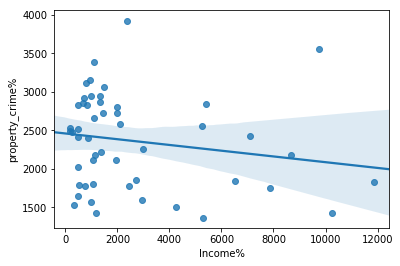

In [24]:
sns.regplot( x ='Income%', y='property_crime%', data = data_complete )

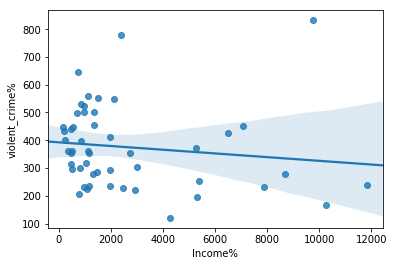

In [25]:
sns.regplot(x ='Income%', y='violent_crime%', data = data_complete)

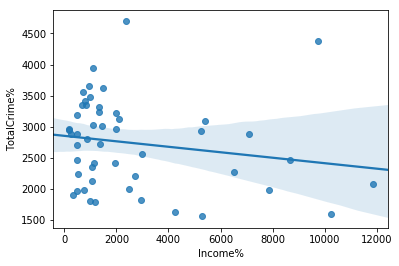

In [26]:
sns.regplot(x ='Income%', y ='TotalCrime%', data = data_complete)

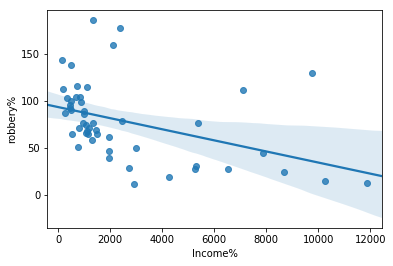

In [27]:
sns.regplot(x='Income%', y='robbery%',data = data_complete)

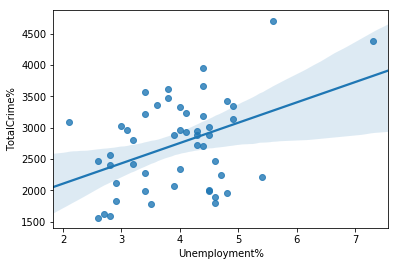

In [28]:
sns.regplot(x='Unemployment%', y ='TotalCrime%' ,data = data_complete)

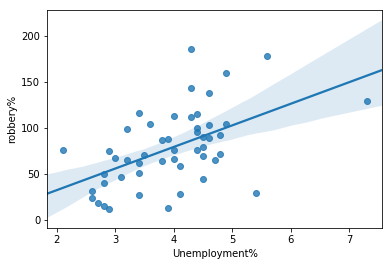

In [29]:
sns.regplot(x='Unemployment%', y ='robbery%' ,data = data_complete)

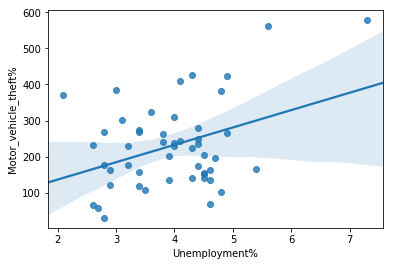

In [30]:
sns.regplot(x='Unemployment%', y ='Motor_vehicle_theft%' ,data = data_complete)

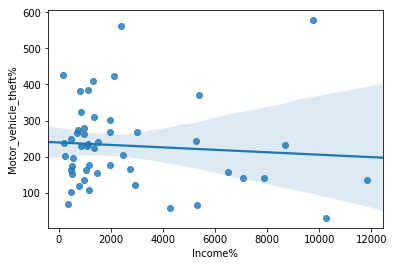

In [31]:
sns.regplot(x='Income%', y ='Motor_vehicle_theft%' ,data = data_complete)

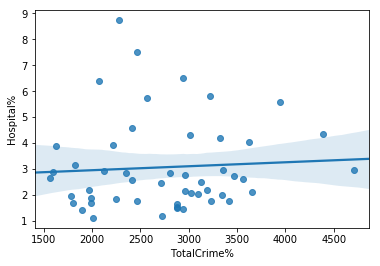

In [32]:
sns.regplot(x='TotalCrime%', y ='Hospital%' ,data = data_complete)

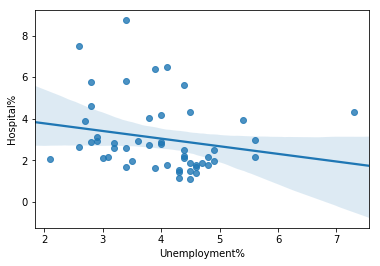

In [33]:
sns.regplot(x='Unemployment%', y ='Hospital%' ,data = data_complete)

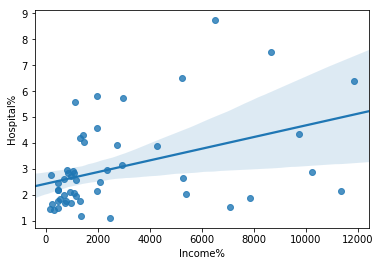

In [34]:
sns.regplot(x='Income%', y ='Hospital%' ,data = data_complete)

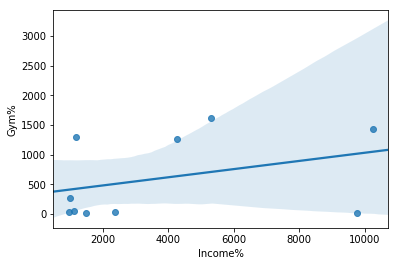

In [35]:
sns.regplot(x='Income%', y ='Gym%' ,data = data_complete_gym)

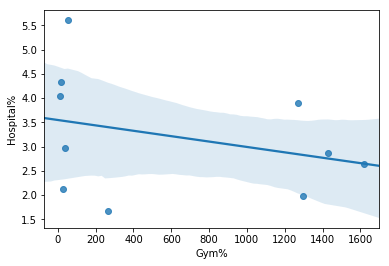

In [36]:
sns.regplot(x='Gym%', y ='Hospital%' ,data = data_complete_gym)

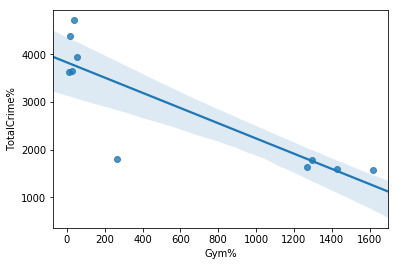

In [37]:
sns.regplot(x='Gym%', y ='TotalCrime%' ,data = data_complete_gym)

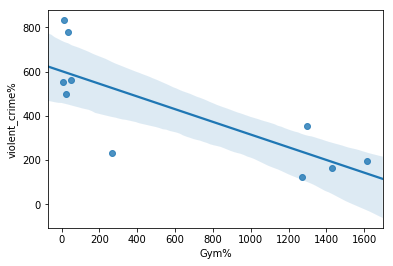

In [38]:
sns.regplot(x='Gym%', y ='violent_crime%',data = data_complete_gym)

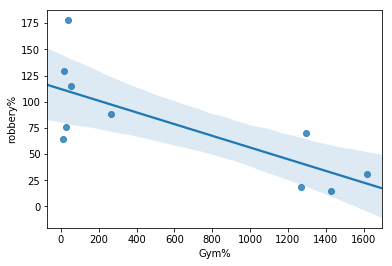

In [39]:
sns.regplot(x='Gym%', y ='robbery%',data = data_complete_gym)

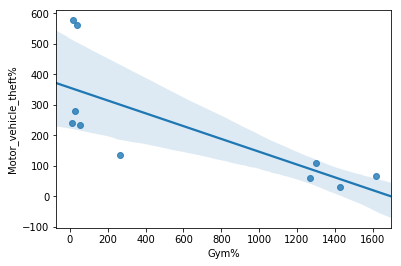

In [40]:
sns.regplot(x='Gym%', y ='Motor_vehicle_theft%',data = data_complete_gym)

C:\Users\lianx\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


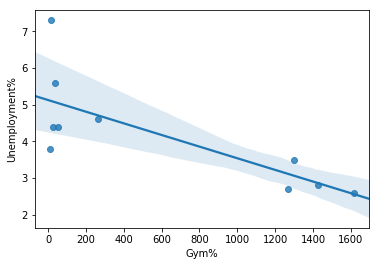

In [111]:
sns.regplot(x='Gym%', y ='Unemployment%',data = data_complete_gym)

In [ ]:
sns.regplot(x='Gym%', y ='property_crime%',data = data_complete_gym)

In [67]:
#model.sm.OLS(df['prop'])
# x = np.array([0,a])
# y = slope*x + intercept
# _ = plt.plot(list(data_complete['Income%']), list(data_complete['property_crime%']), marker='o',linestyle ='none')
# _ = plt.plot(x,y)

In [ ]:
#hospital_state_series = hospital_state.set_index('index')
#hospital_state_series.head()

In [ ]:
#hospital_state_series.index = hospital_state_series.index.map(states_dict)
#hospital_state_series.head()

### Plot the result data_complete_gym

In [48]:
data_complete_gym.head()

,State,Latitude,Longitude,Hospital%,Income%,Unemployment%,Motor_vehicle_theft%,property_crime%,robbery%,violent_crime%,TotalCrime%,Gym%
0,LA,31.0689,-91.9968,5.60,1115.908568,4.4,235.237162,3384.393660,114.979084,559.916806,3944.310467,51.330714
1,NJ,40.1907,-74.6728,1.68,981.792069,4.6,136.610795,1572.494646,88.623026,231.284209,1803.778854,265.970105
2,MA,42.2596,-71.8083,1.97,1169.097583,3.5,109.241339,1428.178383,70.572223,355.831206,1784.009589,1298.305789
3,AR,34.8938,-92.4426,4.05,1492.343229,3.8,240.657636,3068.824500,64.204126,553.150896,3621.975397,9.157798
4,SC,33.9169,-80.8964,2.12,958.168433,4.4,280.421791,3158.359341,76.119263,500.223539,3658.582880,25.510771


In [89]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_complete[["Latitude", "Longitude"]].astype(float)
# Convert density to float and store
hos_density = data_complete['Hospital%'].astype(float)
hos_density
min(hos_density)

1.12

In [110]:
import gmaps
#Heatmap of hospital density 
#Configure gmaps with API key
gmaps.configure(api_key=gkey)
# Create a  Heatmap layer


fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=hos_density, 
                                 dissipating=False, max_intensity=4,
                                 point_radius =2) #, gradient = ['white', 'red']
# Adjust heat_layer setting to help with heatmap dissipating on zoom
# heat_layer.dissipating = False
# heat_layer.max_intensity = 40
# heat_layer.point_radius = 4

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [93]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import gmaps.geojson_geometries

norm = colors.Normalize(vmin=min(hos_density), vmax = max(hos_density))

m = cm.ScalarMappable(norm = norm, cmap='OrRd')
colormap = m.to_rgba(hos_density)
clr = [colors.to_hex(c) for c in colormap]

colorcoded_states = pd.Series(clr, index = data_complete['State'])
colorcoded_states = colorcoded_states.to_frame()

states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","District of Columbia","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

state_abbre = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","HI","ID","IL","IN",
              "IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV",
              "NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","PR","RI","SC","SD","TN",
              "TX","UT","VT","VA","WA","WV","WI","WY"]

state_dict = dict(zip(state_abbre, states))

state_names = pd.Series(states, index = state_abbre)
state_names = state_names.to_frame()
state_names.head()
len(states)

52

In [113]:
state_color = colorcoded_states.merge(state_names, right_index = True, left_index = True)
state_color = state_color.rename(index=str, columns={"0_x": "color", "0_y": "state"})
states_geo = gmaps.geojson_geometries.load_geometry('us-states')

# get list of states as they are ordered in gmaps
st = [i['properties']['NAME'] for i in states_geo['features']]
len(st)
# find territories, missing in the original dataframe and present in the 'us-states' geojson file
missing = [s for s in st if s not in states]

len(missing)
# Add the territories to the frame and color them white
if len(missing) > 0:
    missing_df = pd.DataFrame([['#ffffff', missing[0]], ['#ffffff', missing[1]]], columns=list(state_color), index = ['DC', 'PR'])
    state_color = state_color.append(missing_df)

In [112]:
state_order = pd.DataFrame(pd.Series(st), columns = ['state'])
state_order
# Create a layer for color coded states
gmaps.configure(api_key = gkey)
fig = gmaps.figure()
states_layer = gmaps.geojson_layer(states_geo, fill_color = list(df['color']))
fig.add_layer(states_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [105]:
# create a state-color dataframe for geojson layer
df = state_order.merge(state_color, on = 'state')


,state,color
0,Arizona,#feeacc
1,Arkansas,#fdb881
2,California,#fff2e1
3,Colorado,#fee8c8
4,Connecticut,#fff7ec
5,District of Columbia,#fee7c5
6,Georgia,#fee6c4
7,Hawaii,#fee9ca
8,Illinois,#feedd4
9,Indiana,#fdd8a7


Figure(layout=FigureLayout(height='420px'))